In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Source and Contents

In [2]:
#Data Source:
df=pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [3]:
df['hours_per_week_bin_1']=df['hours_per_week_bin'].apply(lambda x:x.split('.')[0])
df['occupation_bin_1']=df['occupation_bin'].apply(lambda x:x.split('.')[0])
df['msr_bin_1']=df['msr_bin'].apply(lambda x:x.split('.')[0])
df['capital_gl_bin_1']=df['capital_gl_bin'].apply(lambda x:x.split('.')[0])
df['race_sex_bin_1']=df['race_sex_bin'].apply(lambda x:x.split('.')[0])
df['education_num_bin_1']=df['education_num_bin'].apply(lambda x:x.split('.')[0])
df['education_bin_1']=df['education_bin'].apply(lambda x:x.split('.')[0])
df['workclass_bin_1']=df['workclass_bin'].apply(lambda x:x.split('.')[0])
df['age_bin_1']=df['age_bin'].apply(lambda x:x.split('.')[0])
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y,hours_per_week_bin_1,occupation_bin_1,msr_bin_1,capital_gl_bin_1,race_sex_bin_1,education_num_bin_1,education_bin_1,workclass_bin_1,age_bin_1
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0,b,b,b,c,c,c,c,b,d
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,a,e,c,a,c,c,c,b,e
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0,b,a,b,a,c,b,b,b,d
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0,b,a,c,a,b,a,a,b,e
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0,b,e,c,a,a,c,c,b,b


In [4]:
df['hours_per_week_bin_1']=df['hours_per_week_bin_1'].astype('category')
df['hours_per_week_bin_c']=df['hours_per_week_bin_1'].cat.codes
df['occupation_bin_1']=df['occupation_bin_1'].astype('category')
df['occupation_bin_c']=df['occupation_bin_1'].cat.codes
df['msr_bin_1']=df['msr_bin_1'].astype('category')
df['msr_bin_c']=df['msr_bin_1'].cat.codes
df['capital_gl_bin_1']=df['capital_gl_bin_1'].astype('category')
df['capital_gl_bin_c']=df['capital_gl_bin_1'].cat.codes
df['race_sex_bin_1']=df['race_sex_bin_1'].astype('category')
df['race_sex_bin_c']=df['race_sex_bin_1'].cat.codes
df['workclass_bin_1']=df['workclass_bin_1'].astype('category')
df['workclass_bin_c']=df['workclass_bin_1'].cat.codes
df['education_num_bin_1']=df['education_num_bin_1'].astype('category')
df['education_num_bin_c']=df['education_num_bin_1'].cat.codes
df['education_bin_1']=df['education_bin_1'].astype('category')
df['education_bin_c']=df['education_bin_1'].cat.codes
df['age_bin_1']=df['age_bin_1'].astype('category')
df['age_bin_c']=df['age_bin_1'].cat.codes
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,...,age_bin_1,hours_per_week_bin_c,occupation_bin_c,msr_bin_c,capital_gl_bin_c,race_sex_bin_c,workclass_bin_c,education_num_bin_c,education_bin_c,age_bin_c
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,...,d,1,1,1,2,2,1,2,2,3
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,...,e,0,4,2,0,2,1,2,2,4
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,...,d,1,0,1,0,2,1,1,1,3
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,...,e,1,0,2,0,1,1,0,0,4
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,...,b,1,4,2,0,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,...,d,1,4,1,0,1,1,2,2,3
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,...,c,1,1,0,0,1,0,1,1,2
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,...,d,3,4,2,0,2,1,2,2,3
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,...,e,1,1,0,2,2,1,2,2,4


In [5]:
train_data=df[df['flag']=='train']
test_data=df[df['flag']=='test']

In [6]:
X_train,y_train=train_data[['hours_per_week_bin_c','occupation_bin_c','msr_bin_c','capital_gl_bin_c','race_sex_bin_c','education_num_bin_c','education_bin_c','workclass_bin_c','age_bin_c']],train_data['y']
X_test,y_test=test_data[['hours_per_week_bin_c','occupation_bin_c','msr_bin_c','capital_gl_bin_c','race_sex_bin_c','education_num_bin_c','education_bin_c','workclass_bin_c','age_bin_c']],test_data['y']

# 2. Finding Optimal Value of a key Ensemble Method Hyperparameter

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score

<AxesSubplot:>

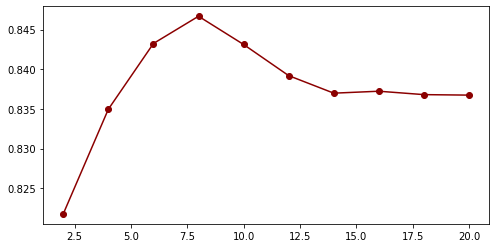

In [9]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
auc_result = []

max_depth_options = [2,4,6,8,10,12,14,16,18,20]


for i in max_depth_options:
    model = DecisionTreeClassifier(max_depth=i,random_state=101)
    model.fit(X_train,y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    auc_result.append(auc)

<AxesSubplot:>

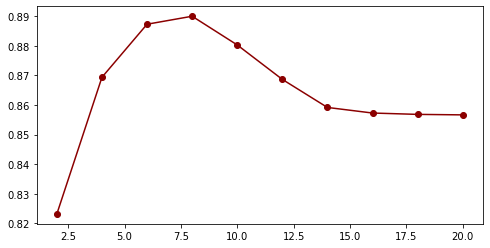

In [12]:
plt.figure(figsize=(8,4))
pd.Series(auc_result, max_depth_options).plot(color="darkred",marker="o")

# 3. Building a Random Forest Model

In [13]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

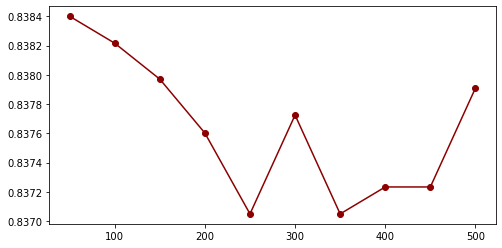

In [14]:
RD_Accuracy_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = RandomForestClassifier(n_estimators=trees, random_state=101)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  RD_Accuracy_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(RD_Accuracy_results, n_estimators).plot(color="darkred",marker="o")

In [15]:
RD_auc_result = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for i in n_estimators:
    model = RandomForestClassifier(n_estimators=i,random_state=101)
    model.fit(X_train,y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    RD_auc_result.append(auc)

<AxesSubplot:>

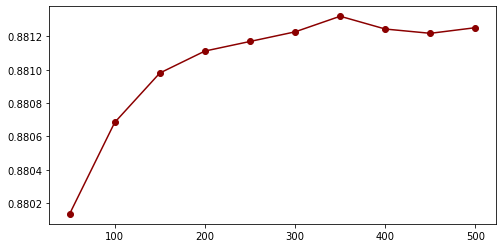

In [17]:
plt.figure(figsize=(8,4))
pd.Series(RD_auc_result, n_estimators).plot(color="darkred",marker="o")

# 1. Write your observations about the Classifier’s behavior with respect to the number of estimators:
# The classifier's behavior it to evaluate the accuracy and the interference of dichotomies on each estimator

# 2. Is there an optimal value of the estimator within the given range?
# o.8377 on 300 in Accuracy and over 0.8812 on 360 in AUC

# 4. Building AdaBoost, Gradient Boost, and XGB.

In [18]:
from sklearn.ensemble import AdaBoostClassifier

<AxesSubplot:>

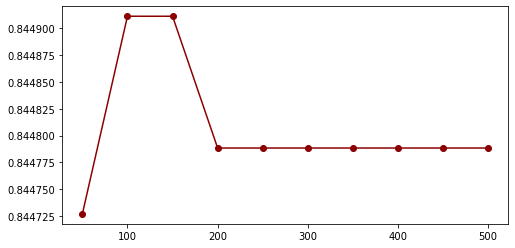

In [20]:
Ada_Accuracy_results = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]
for trees in n_estimators:
  model = AdaBoostClassifier(n_estimators=trees, random_state=101)
  model.fit(X_train,y_train.values.ravel())
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  Ada_Accuracy_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(Ada_Accuracy_results, n_estimators).plot(color="darkred",marker="o")

In [21]:
Ada_auc_result = []
n_estimators = [50,100,150,200,250,300,350,400,450,500]

for i in n_estimators:
    model = AdaBoostClassifier(n_estimators=i,random_state=101)
    model.fit(X_train,y_train.values.ravel())
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    Ada_auc_result.append(auc)

<AxesSubplot:>

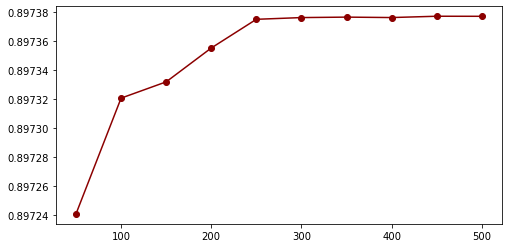

In [22]:
plt.figure(figsize=(8,4))
pd.Series(Ada_auc_result, n_estimators).plot(color="darkred",marker="o")

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

<AxesSubplot:>

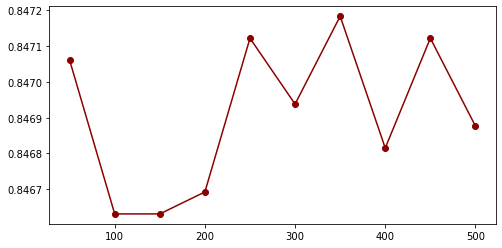

In [25]:
GB_Accuracy = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  model.fit(X_train,y_train.values.ravel())
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  GB_Accuracy.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(GB_Accuracy, n_estimators).plot(color="darkred",marker="o")

<AxesSubplot:>

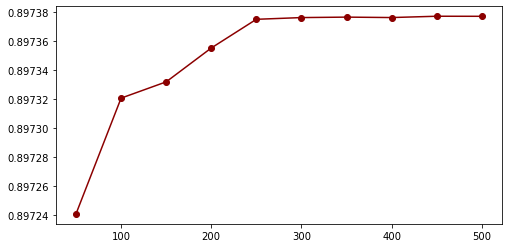

In [26]:
GB_auc = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for i in n_estimators:
    model = AdaBoostClassifier(n_estimators=i,random_state=101)
    model.fit(X_train,y_train.values.ravel())
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    GB_auc.append(auc)

plt.figure(figsize=(8,4))
pd.Series(GB_auc, n_estimators).plot(color="darkred",marker="o")

In [27]:
from xgboost import XGBClassifier as xgb

<AxesSubplot:>

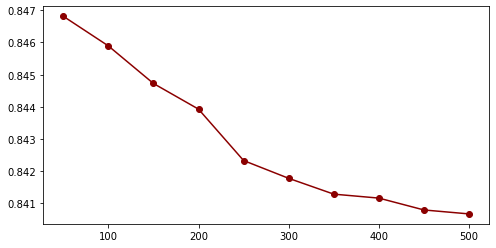

In [28]:
xgb_Accuracy = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimators:
  model = xgb(n_estimators=trees, random_state=101)
  model.fit(X_train,y_train.values.ravel())
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  xgb_Accuracy.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(xgb_Accuracy, n_estimators).plot(color="darkred",marker="o")

<AxesSubplot:>

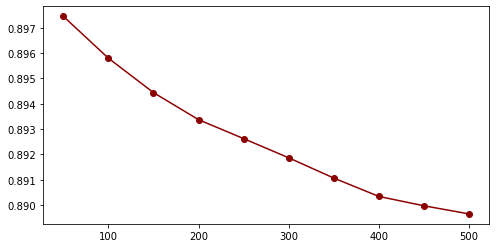

In [29]:
xgb_auc = []

n_estimators = [50,100,150,200,250,300,350,400,450,500]

for i in n_estimators:
    model = xgb(n_estimators=i,random_state=101)
    model.fit(X_train,y_train.values.ravel())
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    xgb_auc.append(auc)

plt.figure(figsize=(8,4))
pd.Series(xgb_auc, n_estimators).plot(color="darkred",marker="o")

# 5. Compare Performance

In [30]:
Model = pd.DataFrame({
    'RandomForest':[max(RD_Accuracy_results), max(RD_auc_result)],
    'Ada': [max(Ada_Accuracy_results),max(Ada_auc_result)],
    'Gradient': [max(GB_Accuracy),max(GB_auc)],
    'XGB':[max(xgb_Accuracy),max(xgb_auc)]},
    index = ['Accuracy','AUC'])

In [31]:
Model

,RandomForest,Ada,Gradient,XGB
Accuracy,0.838401,0.844911,0.847184,0.846815
AUC,0.881321,0.897377,0.897377,0.897458
